In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../datasets/Resume.csv")

print(df.head())
print("\nColumns:", df.columns)
print("\nShape:", df.shape)


         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  

Columns: Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='str')

Shape: (2484, 4)


In [3]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['cleaned_resume'] = df['Resume_str'].apply(clean_text)

print(df[['Resume_str', 'cleaned_resume']].head())

                                          Resume_str  \
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1           HR SPECIALIST, US HR OPERATIONS      ...   
2           HR DIRECTOR       Summary      Over 2...   
3           HR SPECIALIST       Summary    Dedica...   
4           HR MANAGER         Skill Highlights  ...   

                                      cleaned_resume  
0  hr administrator marketing associate hr admini...  
1  hr specialist us hr operations summary versati...  
2  hr director summary over years experience in r...  
3  hr specialist summary dedicated driven and dyn...  
4  hr manager skill highlights hr skills hr depar...  


In [4]:
vectorizer = TfidfVectorizer(
    stop_words="english",
    ngram_range=(1,3),
    min_df=2,
    max_features=20000
)

X = vectorizer.fit_transform(df['cleaned_resume'])
y = df['Category']

print("Feature matrix shape:", X.shape)

Feature matrix shape: (2484, 20000)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training size:", X_train.shape)
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
print("Model trained successfully.")
print("Testing size:", X_test.shape)

Training size: (1987, 20000)
Model trained successfully.
Testing size: (497, 20000)


In [6]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rand

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7263581488933601


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")

Naive Bayes: 0.5614
Logistic Regression: 0.6620
Linear SVM: 0.7264


In [9]:
best_model = LinearSVC()
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.70      0.88      0.78        24
              ADVOCATE       0.61      0.71      0.65        24
           AGRICULTURE       1.00      0.62      0.76        13
               APPAREL       0.60      0.32      0.41        19
                  ARTS       0.71      0.48      0.57        21
            AUTOMOBILE       0.67      0.29      0.40         7
              AVIATION       0.77      0.71      0.74        24
               BANKING       0.75      0.78      0.77        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.70      0.88      0.78        24
                  CHEF       0.86      0.79      0.83        24
          CONSTRUCTION       0.76      0.86      0.81        22
            CONSULTANT       0.75      0.39      0.51        23
              DESIGNER       0.90      0.90      0.90        21
         DIGITAL-MEDIA       0.73      

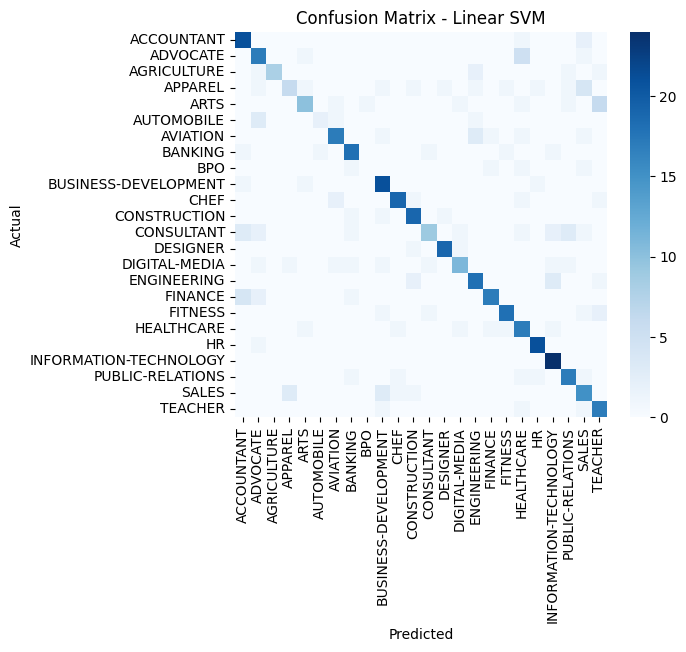

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Linear SVM")
plt.show()

In [11]:
df["Category"].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
FINANCE                   118
ENGINEERING               118
ACCOUNTANT                118
FITNESS                   117
AVIATION                  117
SALES                     116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [12]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

bpo_errors = results[results["Actual"] == "BPO"]

print(bpo_errors["Predicted"].value_counts())

Predicted
BANKING       1
FINANCE       1
HEALTHCARE    1
SALES         1
Name: count, dtype: int64


In [13]:
bpo_texts = df[df["Category"] == "BPO"]["cleaned_resume"]

vectorizer_small = TfidfVectorizer(stop_words="english", max_features=30)
X_bpo = vectorizer_small.fit_transform(bpo_texts)

print(vectorizer_small.get_feature_names_out())

['business' 'city' 'claims' 'client' 'clients' 'company' 'customer'
 'development' 'experience' 'information' 'managed' 'management' 'manager'
 'network' 'new' 'office' 'operations' 'performance' 'process'
 'professional' 'quality' 'sales' 'service' 'skills' 'state' 'support'
 'team' 'training' 'various' 'work']


In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Fit vectorizer again on full dataset
X_full = vectorizer.fit_transform(df['cleaned_resume'])
y_full = df['Category']

classes = np.unique(y_full)
centroids = []

for c in classes:
    mask = (y_full == c).values
    class_vectors = X_full[mask]
    
    # Compute centroid and convert properly
    centroid = np.asarray(class_vectors.mean(axis=0)).ravel()
    centroids.append(centroid)

centroids = np.vstack(centroids)

similarity_matrix = cosine_similarity(centroids)

sim_df = pd.DataFrame(similarity_matrix, index=classes, columns=classes)

sim_df.round(2)

,ACCOUNTANT,ADVOCATE,AGRICULTURE,APPAREL,ARTS,AUTOMOBILE,AVIATION,BANKING,BPO,BUSINESS-DEVELOPMENT,...,DIGITAL-MEDIA,ENGINEERING,FINANCE,FITNESS,HEALTHCARE,HR,INFORMATION-TECHNOLOGY,PUBLIC-RELATIONS,SALES,TEACHER
ACCOUNTANT,1.00,0.46,0.44,0.45,0.38,0.47,0.38,0.57,0.43,0.41,...,0.32,0.32,0.83,0.37,0.43,0.38,0.33,0.32,0.39,0.27
ADVOCATE,0.46,1.00,0.69,0.70,0.70,0.74,0.58,0.68,0.61,0.62,...,0.52,0.48,0.55,0.68,0.83,0.55,0.50,0.53,0.71,0.55
AGRICULTURE,0.44,0.69,1.00,0.62,0.69,0.62,0.58,0.62,0.55,0.56,...,0.52,0.55,0.55,0.58,0.65,0.47,0.54,0.55,0.56,0.56
APPAREL,0.45,0.70,0.62,1.00,0.66,0.68,0.58,0.67,0.61,0.71,...,0.61,0.53,0.57,0.63,0.63,0.50,0.48,0.57,0.81,0.45
ARTS,0.38,0.70,0.69,0.66,1.00,0.61,0.55,0.58,0.53,0.56,...,0.55,0.48,0.48,0.63,0.63,0.48,0.50,0.57,0.62,0.78
AUTOMOBILE,0.47,0.74,0.62,0.68,0.61,1.00,0.60,0.67,0.62,0.61,...,0.50,0.53,0.55,0.59,0.66,0.50,0.54,0.48,0.67,0.43
AVIATION,0.38,0.58,0.58,0.58,0.55,0.60,1.00,0.52,0.52,0.48,...,0.42,0.62,0.47,0.51,0.56,0.42,0.54,0.40,0.53,0.38
BANKING,0.57,0.68,0.62,0.67,0.58,0.67,0.52,1.00,0.68,0.73,...,0.56,0.49,0.71,0.58,0.64,0.50,0.54,0.52,0.64,0.40
BPO,0.43,0.61,0.55,0.61,0.53,0.62,0.52,0.68,1.00,0.61,...,0.51,0.50,0.56,0.51,0.60,0.53,0.60,0.45,0.54,0.35
BUSINESS-DEVELOPMENT,0.41,0.62,0.56,0.71,0.56,0.61,0.48,0.73,0.61,1.00,...,0.65,0.44,0.57,0.57,0.63,0.45,0.48,0.58,0.70,0.37


In [15]:
sim_df.loc["ARTS"].sort_values(ascending=False)

ARTS                      1.000000
TEACHER                   0.778820
ADVOCATE                  0.704675
AGRICULTURE               0.692842
APPAREL                   0.657503
CONSULTANT                0.637130
HEALTHCARE                0.630726
FITNESS                   0.625668
SALES                     0.623522
AUTOMOBILE                0.610537
BANKING                   0.583901
PUBLIC-RELATIONS          0.565360
BUSINESS-DEVELOPMENT      0.562786
DESIGNER                  0.550963
DIGITAL-MEDIA             0.549228
AVIATION                  0.546944
BPO                       0.534308
INFORMATION-TECHNOLOGY    0.496581
FINANCE                   0.483246
ENGINEERING               0.479643
HR                        0.479259
CHEF                      0.463947
CONSTRUCTION              0.457516
ACCOUNTANT                0.384460
Name: ARTS, dtype: float64

In [16]:
sim_df.loc["CONSULTANT"].sort_values(ascending=False)

CONSULTANT                1.000000
INFORMATION-TECHNOLOGY    0.751460
BANKING                   0.750136
BUSINESS-DEVELOPMENT      0.723399
HEALTHCARE                0.712344
BPO                       0.709706
ADVOCATE                  0.698406
AGRICULTURE               0.692509
APPAREL                   0.691893
AUTOMOBILE                0.690367
DIGITAL-MEDIA             0.662481
FINANCE                   0.656428
ARTS                      0.637130
ENGINEERING               0.636536
SALES                     0.615948
AVIATION                  0.613992
PUBLIC-RELATIONS          0.593390
FITNESS                   0.583856
DESIGNER                  0.562315
HR                        0.544356
CONSTRUCTION              0.528609
ACCOUNTANT                0.523389
TEACHER                   0.424920
CHEF                      0.411171
Name: CONSULTANT, dtype: float64

In [17]:
sim_df.loc["APPAREL"].sort_values(ascending=False)

APPAREL                   1.000000
SALES                     0.812416
BUSINESS-DEVELOPMENT      0.705673
ADVOCATE                  0.703730
CONSULTANT                0.691893
AUTOMOBILE                0.675591
BANKING                   0.674351
ARTS                      0.657503
HEALTHCARE                0.631106
FITNESS                   0.629437
DESIGNER                  0.618570
AGRICULTURE               0.616709
DIGITAL-MEDIA             0.607192
BPO                       0.606732
AVIATION                  0.577751
FINANCE                   0.568114
PUBLIC-RELATIONS          0.567363
ENGINEERING               0.526388
CONSTRUCTION              0.504603
HR                        0.497387
INFORMATION-TECHNOLOGY    0.481364
CHEF                      0.452535
TEACHER                   0.452221
ACCOUNTANT                0.450715
Name: APPAREL, dtype: float64

In [18]:
sim_df.loc["AUTOMOBILE"].sort_values(ascending=False)

AUTOMOBILE                1.000000
ADVOCATE                  0.738053
CONSULTANT                0.690367
APPAREL                   0.675591
BANKING                   0.667847
SALES                     0.666777
HEALTHCARE                0.659645
AGRICULTURE               0.624433
BPO                       0.619310
ARTS                      0.610537
BUSINESS-DEVELOPMENT      0.605553
AVIATION                  0.600708
FITNESS                   0.590431
FINANCE                   0.553935
INFORMATION-TECHNOLOGY    0.537872
ENGINEERING               0.530980
DIGITAL-MEDIA             0.503816
HR                        0.500394
DESIGNER                  0.490601
CONSTRUCTION              0.480885
PUBLIC-RELATIONS          0.476382
ACCOUNTANT                0.472370
TEACHER                   0.429417
CHEF                      0.405702
Name: AUTOMOBILE, dtype: float64

In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Make sure this is your full dataset vectorization
X_full = vectorizer.transform(df["cleaned_resume"])
y_full = df["Category"].values  # convert to numpy array

classes = np.unique(y_full)
centroids = []

for c in classes:
    # Get row indices where class matches
    indices = np.where(y_full == c)[0]

    # Select rows properly from sparse matrix
    class_vectors = X_full[indices]

    # Compute centroid
    centroid = class_vectors.mean(axis=0)

    # Convert to flat numpy array
    centroids.append(np.asarray(centroid).ravel())

centroids = np.vstack(centroids)

# Compute similarity matrix
sim_matrix = cosine_similarity(centroids)

sim_df = pd.DataFrame(sim_matrix, index=classes, columns=classes)

sim_df.round(3)

,ACCOUNTANT,ADVOCATE,AGRICULTURE,APPAREL,ARTS,AUTOMOBILE,AVIATION,BANKING,BPO,BUSINESS-DEVELOPMENT,...,DIGITAL-MEDIA,ENGINEERING,FINANCE,FITNESS,HEALTHCARE,HR,INFORMATION-TECHNOLOGY,PUBLIC-RELATIONS,SALES,TEACHER
ACCOUNTANT,1.000,0.457,0.443,0.451,0.384,0.472,0.376,0.567,0.433,0.414,...,0.322,0.317,0.827,0.367,0.427,0.378,0.330,0.318,0.391,0.265
ADVOCATE,0.457,1.000,0.688,0.704,0.705,0.738,0.580,0.679,0.609,0.621,...,0.517,0.477,0.551,0.681,0.825,0.552,0.505,0.527,0.707,0.548
AGRICULTURE,0.443,0.688,1.000,0.617,0.693,0.624,0.584,0.623,0.554,0.564,...,0.521,0.554,0.549,0.585,0.650,0.472,0.539,0.548,0.555,0.555
APPAREL,0.451,0.704,0.617,1.000,0.658,0.676,0.578,0.674,0.607,0.706,...,0.607,0.526,0.568,0.629,0.631,0.497,0.481,0.567,0.812,0.452
ARTS,0.384,0.705,0.693,0.658,1.000,0.611,0.547,0.584,0.534,0.563,...,0.549,0.480,0.483,0.626,0.631,0.479,0.497,0.565,0.624,0.779
AUTOMOBILE,0.472,0.738,0.624,0.676,0.611,1.000,0.601,0.668,0.619,0.606,...,0.504,0.531,0.554,0.590,0.660,0.500,0.538,0.476,0.667,0.429
AVIATION,0.376,0.580,0.584,0.578,0.547,0.601,1.000,0.523,0.523,0.482,...,0.422,0.621,0.465,0.509,0.557,0.423,0.536,0.401,0.532,0.376
BANKING,0.567,0.679,0.623,0.674,0.584,0.668,0.523,1.000,0.680,0.727,...,0.557,0.486,0.713,0.575,0.635,0.501,0.537,0.517,0.636,0.395
BPO,0.433,0.609,0.554,0.607,0.534,0.619,0.523,0.680,1.000,0.608,...,0.512,0.501,0.561,0.505,0.597,0.528,0.605,0.452,0.540,0.349
BUSINESS-DEVELOPMENT,0.414,0.621,0.564,0.706,0.563,0.606,0.482,0.727,0.608,1.000,...,0.649,0.441,0.570,0.571,0.630,0.455,0.476,0.578,0.704,0.373


In [21]:
sim_df.loc["INFORMATION-TECHNOLOGY"].sort_values(ascending=False)

INFORMATION-TECHNOLOGY    1.000000
CONSULTANT                0.751460
BPO                       0.604730
ENGINEERING               0.576185
AGRICULTURE               0.538746
AUTOMOBILE                0.537872
BANKING                   0.536844
AVIATION                  0.535741
HEALTHCARE                0.522383
ADVOCATE                  0.504723
ARTS                      0.496581
APPAREL                   0.481364
BUSINESS-DEVELOPMENT      0.475614
DIGITAL-MEDIA             0.473070
DESIGNER                  0.438680
FINANCE                   0.434890
CONSTRUCTION              0.415158
SALES                     0.413762
FITNESS                   0.405528
PUBLIC-RELATIONS          0.388779
HR                        0.383116
ACCOUNTANT                0.329889
TEACHER                   0.323536
CHEF                      0.278078
Name: INFORMATION-TECHNOLOGY, dtype: float64

In [22]:
feature_names = vectorizer.get_feature_names_out()


def top_words_for_class(class_name, top_n=20):
    idx = list(classes).index(class_name)
    centroid = centroids[idx]
    top_indices = centroid.argsort()[::-1][:top_n]
    return [feature_names[i] for i in top_indices]


print("Top IT words:")
print(top_words_for_class("INFORMATION-TECHNOLOGY"))

print("\nTop AGRICULTURE words:")
print(top_words_for_class("AGRICULTURE"))

Top IT words:
['network', 'technology', 'information technology', 'information', 'systems', 'server', 'support', 'hardware', 'security', 'software', 'management', 'windows', 'project', 'data', 'technical', 'business', 'sql', 'servers', 'state', 'infrastructure']

Top AGRICULTURE words:
['agriculture', 'state', 'city', 'city state', 'company', 'research', 'management', 'program', 'students', 'project', 'data', 'company city', 'development', 'company city state', 'health', 'science', 'student', 'skills', 'university', 'community']


In [23]:
model = best_model  # your SVM

feature_names = vectorizer.get_feature_names_out()


def top_weights_for_class(class_name, top_n=20):
    class_index = list(model.classes_).index(class_name)
    weights = model.coef_[class_index]

    top_indices = weights.argsort()[::-1][:top_n]
    return [feature_names[i] for i in top_indices]


print("Top IT weights:")
print(top_weights_for_class("INFORMATION-TECHNOLOGY"))

print("\nTop AGRICULTURE weights:")
print(top_weights_for_class("AGRICULTURE"))

Top IT weights:
['information technology', 'technology', 'information', 'information technology specialist', 'technology specialist', 'technology manager', 'football', 'information technology manager', 'infrastructure', 'pharmacy', 'letter', 'security', 'experience information technology', 'application', 'systems', 'qa', 'experience information', 'drupal', 'database', 'sql']

Top AGRICULTURE weights:
['agriculture', 'agricultural', 'soil', 'mi', 'land', 'extension', 'microbial', 'formulation', 'water', 'chemist', 'molecular', 'supervisor', 'fraud', 'snap', 'land use', 'farmers', 'epic', 'jamaica', 'trees', 'protein']
